In [ ]:
import numpy as np
import pandas as pd

In [ ]:
def relu(x):
  # if x > 0:
  #   return x
  # else:
  #   return 0
  
  if x > 0:
    return x

  return 0

In [ ]:
# generate numbers between -5 to 5 to serve as inputs to relu
x = np.linspace(-5, 5, 101)
# apply relu to all our numbers
y = [relu(z) for z in x]

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,-5.0,0.0
1,-4.9,0.0
2,-4.8,0.0
3,-4.7,0.0
4,-4.6,0.0


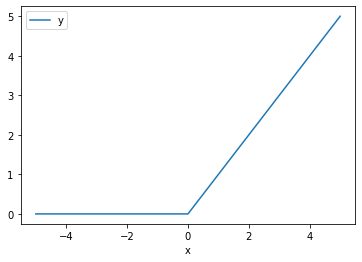

In [ ]:
df.plot(x='x', y='y')

In [ ]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
x = np.linspace(-5, 5, 101)
y = [sigmoid(z) for z in x]

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})
df.head()

,x,y
0,-5.0,0.006693
1,-4.9,0.007392
2,-4.8,0.008163
3,-4.7,0.009013
4,-4.6,0.009952


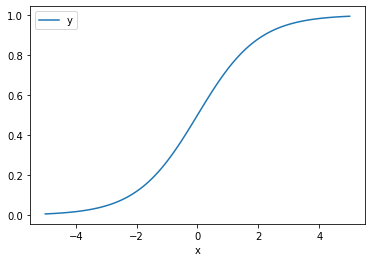

In [ ]:
df.plot(x='x', y='y')

In [ ]:
def leaky_relu(x):
  if x > 0:
    return x

  return 0.01 * x

In [ ]:
x = np.linspace(-5, 5, 101)
y = [leaky_relu(z) for z in x]

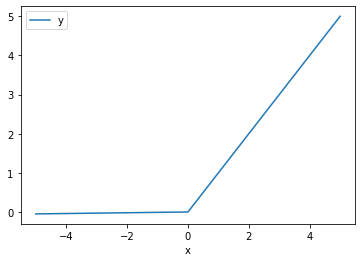

In [ ]:
df = pd.DataFrame({'x': x, 'y': y})
df.plot(x='x', y='y')

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

csection = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv')

In [ ]:
csection.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


In [ ]:
csection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              80 non-null     int64
 1   Delivery number  80 non-null     int64
 2   Delivery time    80 non-null     int64
 3   Blood Pressure   80 non-null     int64
 4   Heart Problem    80 non-null     int64
 5   Caesarian        80 non-null     int64
dtypes: int64(6)
memory usage: 3.9 KB


In [ ]:
c_dummy = pd.get_dummies(csection, columns=['Delivery number', 'Delivery time', 'Blood Pressure'], drop_first=True)

In [ ]:
c_dummy.head()

,Age,Heart Problem,Caesarian,Delivery number_2,Delivery number_3,Delivery number_4,Delivery time_1,Delivery time_2,Blood Pressure_1,Blood Pressure_2
0,22,0,0,0,0,0,0,0,0,1
1,26,0,1,1,0,0,0,0,1,0
2,26,0,0,1,0,0,1,0,1,0
3,28,0,0,0,0,0,0,0,0,1
4,22,0,1,1,0,0,0,0,1,0


In [ ]:
x = c_dummy.drop(columns=['Caesarian'])
y = c_dummy['Caesarian']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X_train.shape[1]

9

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='tanh'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=50, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 208ms/step - loss: 8.4580 - accuracy: 0.4517 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 2/500
2/2 [==============================] - 0s 53ms/step - loss: 8.7665 - accuracy: 0.4317 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 3/500
2/2 [==============================] - 0s 50ms/step - loss: 8.7665 - accuracy: 0.4317 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 4/500
2/2 [==============================] - 0s 43ms/step - loss: 8.8693 - accuracy: 0.4250 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 5/500
2/2 [==============================] - 0s 42ms/step - loss: 8.6637 - accuracy: 0.4383 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 6/500
2/2 [==============================] - 0s 47ms/step - loss: 8.4580 - accuracy: 0.4517 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 7/500
2/2 [==============================] - 0s 42ms/step - loss: 8.5608 - accuracy: 0.4450 - val_loss: 9.6406 - val_accuracy: 0.3750
Epoch 8/500
2/2 [==

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # softmax for multiclass classification

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=50, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 222ms/step - loss: 3.7875 - accuracy: 0.4250 - val_loss: 3.4246 - val_accuracy: 0.3750
Epoch 2/500
2/2 [==============================] - 0s 49ms/step - loss: 2.8381 - accuracy: 0.4517 - val_loss: 2.6448 - val_accuracy: 0.3750
Epoch 3/500
2/2 [==============================] - 0s 45ms/step - loss: 2.2666 - accuracy: 0.4383 - val_loss: 1.9566 - val_accuracy: 0.3750
Epoch 4/500
2/2 [==============================] - 0s 48ms/step - loss: 1.6842 - accuracy: 0.4383 - val_loss: 1.3618 - val_accuracy: 0.3750
Epoch 5/500
2/2 [==============================] - 0s 49ms/step - loss: 1.1924 - accuracy: 0.4383 - val_loss: 0.9099 - val_accuracy: 0.3750
Epoch 6/500
2/2 [==============================] - 0s 49ms/step - loss: 0.8353 - accuracy: 0.4250 - val_loss: 0.6853 - val_accuracy: 0.5625
Epoch 7/500
2/2 [==============================] - 0s 53ms/step - loss: 0.6691 - accuracy: 0.5929 - val_loss: 0.6551 - val_accuracy: 0.6250
Epoch 8/500
2/2 [==

In [ ]:
len(X_train)

64

In [ ]:
model.predict(X_test)

array([[0.746616  ],
       [0.7291727 ],
       [0.5902428 ],
       [0.70012414],
       [0.6585928 ],
       [0.9489025 ],
       [0.3985074 ],
       [0.6974628 ],
       [0.35510188],
       [0.18456072],
       [0.956033  ],
       [0.67802566],
       [0.69131845],
       [0.72791153],
       [0.746616  ],
       [0.6090901 ]], dtype=float32)

In [ ]:
# transfer learning